# Model Comparisons

Now that we have attained the models trained on the training set, we must compare the performance of these models on the test set. First we import some necessary libraries.

In [7]:
import os
import pandas as pd
import random
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# 1. Retrieve Results

Each model has a list of predictions for the test set where they give their respective probabilities of the review being positive. We read each list of probabilities in and store them in an array.

In [16]:
lda200k_combined_df = pd.read_csv('pred_probs_combined_50k150.csv')
lda200k_summaries_df = pd.read_csv('pred_probs_summaries_50k150.csv')

w2v200k_combined_df = pd.read_csv('combined_proba_results.csv')
w2v200k_summaries_df = pd.read_csv('summary_proba_results.csv')

In [18]:
w2v200k_combined = w2v200k_combined_df['1']
w2v200k_summaries = w2v200k_summaries_df['1']

In [12]:
lda200k_combined = lda200k_combined_df['Probability of positive']
lda200k_summaries = lda200k_summaries_df['Probability of positive']

# 2. Retrieve test labels

As topic modelling is an unsupervised process, we have to load the test dataset with the sentiment scores (score of 0 is a negative review, score of 1 is a positive review).

In [30]:
test_df = pd.read_csv('test_sentiments_50k.csv')
test = test_df['sentiment']

0        1
1        1
2        1
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

As shown below, the summaries probability csv produced by the word2vec model has 2 less rows than expected. This is because of how the model was designed. Words with frequency below 3 in the corpus are removed hence as two of the summaries contained only one word and these words had a frequency below 3, the whole row was deleted. In order to allow us to compare the probabilities to the test set, we created a separate test set which also had these rows removed. In hindsight, it may have been better practice to note down the index of the removed rows and then remove these rows from the test set for the LDA model also, but as there were only 2 deleted rows, this would not have significantly changed our results.

In [25]:
w2v200k_summaries.shape

(49998,)

Below is the test set for the word2vec model ran on the summaries.

In [28]:
ytest_df = pd.read_csv('y_test_summary.csv')
ytest = ytest_df['sentiment']

# 3. Producing curves

We now take the probabilities produced by the models and produce the ROC based on these values and the true values stored in "test".

Here, we generate the points for the ROC curves using the "roc_curve" function in the sk-learn "metrics" package.

In [38]:
from sklearn.metrics import roc_curve
lda_200k_combined_fpr, lda_200k_combined_tpr, _ = roc_curve(test, lda200k_combined)
lda_200k_summaries_fpr, lda_200k_summaries_tpr, _ = roc_curve(test, lda200k_summaries)

w2v_200k_combined_fpr, w2v_200k_combined_tpr, _ = roc_curve(test, w2v200k_combined)
w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, _ = roc_curve(ytest, w2v200k_summaries)

# 4. Main Comparison

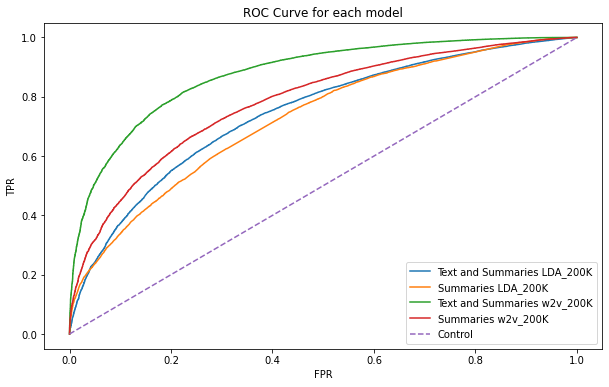

In [40]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA_200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA_200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v_200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v_200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()

# ROC curve zoomed into the top right corner

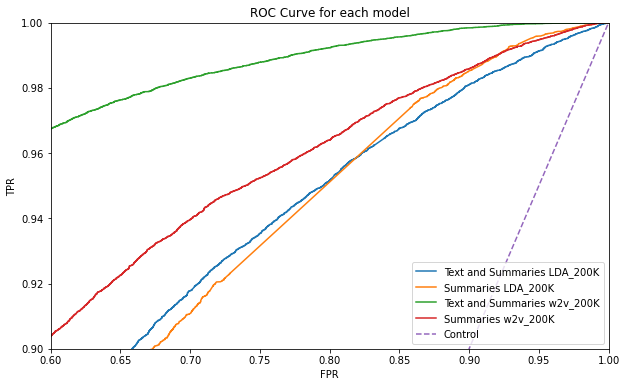

In [42]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA_200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA_200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v_200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v_200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.axis([0.6,1,0.9,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()


# ROC curve zoomed into the origin

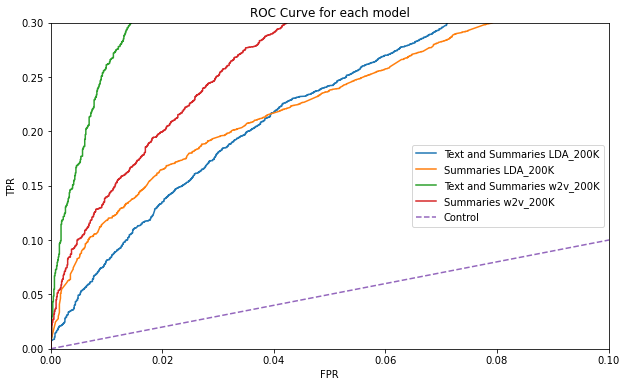

In [45]:
x=[0,1]
y=[0,1]
plt.figure(figsize=(10,6))
plt.plot(lda_200k_combined_fpr, lda_200k_combined_tpr, label='Text and Summaries LDA_200K')
plt.plot(lda_200k_summaries_fpr, lda_200k_summaries_tpr, label='Summaries LDA_200K')
plt.plot(w2v_200k_combined_fpr, w2v_200k_combined_tpr, label='Text and Summaries w2v_200K')
plt.plot(w2v_200k_summaries_fpr, w2v_200k_summaries_tpr, label='Summaries w2v_200K')
plt.plot(x,y,label='Control', linestyle='dashed')
plt.axis([0,0.1,0,0.3])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for each model')
plt.legend()
plt.show()